Predicting S&P500 - Testing different models on one data set

In [1]:
# Import Libraries and Modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

In [2]:
# Importing the dataset
df = pd.read_csv('sphist.csv')
# Checking datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16590 entries, 0 to 16589
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       16590 non-null  object 
 1   Open       16590 non-null  float64
 2   High       16590 non-null  float64
 3   Low        16590 non-null  float64
 4   Close      16590 non-null  float64
 5   Volume     16590 non-null  float64
 6   Adj Close  16590 non-null  float64
dtypes: float64(6), object(1)
memory usage: 907.4+ KB


Data Preprocessing

In [3]:
# Converting Date Column into datetime format
df['Date'] = pd.to_datetime(df['Date'])
df.head()

,Date,Open,High,Low,Close,Volume,Adj Close
0,2015-12-07,2090.419922,2090.419922,2066.780029,2077.070068,4.043820e+09,2077.070068
1,2015-12-04,2051.239990,2093.840088,2051.239990,2091.689941,4.214910e+09,2091.689941
2,2015-12-03,2080.709961,2085.000000,2042.349976,2049.620117,4.306490e+09,2049.620117
3,2015-12-02,2101.709961,2104.270020,2077.110107,2079.510010,3.950640e+09,2079.510010
4,2015-12-01,2082.929932,2103.370117,2082.929932,2102.629883,3.712120e+09,2102.629883


In [4]:
# Sorting the Values
df.info()
df.sort_values( by=['Date'], ascending=True, inplace=True)
df.reset_index( drop=True, inplace=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16590 entries, 0 to 16589
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       16590 non-null  datetime64[ns]
 1   Open       16590 non-null  float64       
 2   High       16590 non-null  float64       
 3   Low        16590 non-null  float64       
 4   Close      16590 non-null  float64       
 5   Volume     16590 non-null  float64       
 6   Adj Close  16590 non-null  float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 907.4 KB


EDA and Data CLeaning



In [5]:
# Data Aggregations on closing price
df['Avg_5'] = df['Close'].rolling( window = 5, center = False).mean()
df['Avg_30'] = df['Close'].rolling( window = 30, center = False).mean()
df['Avg_365'] = df['Close'].rolling( window = 365, center = False).mean()

df['Std_5'] = df['Close'].rolling( window = 5, center = False).std()
df['Std_365'] = df['Close'].rolling( window = 365, center = False).std()
#df['Std_5'] = df['Close'].rolling(window = 5, min_periods = 5).apply( lambda x: np.std(x))
df['Avg_5/365'] = df['Avg_5']/df['Avg_365']
df['Std_5/365'] = df['Std_5']/df['Std_365']
df.head()

,Date,Open,High,Low,Close,Volume,Adj Close,Avg_5,Avg_30,Avg_365,Std_5,Std_365,Avg_5/365,Std_5/365
0,1950-01-03,16.66,16.66,16.66,16.66,1260000.0,16.66,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1950-01-04,16.85,16.85,16.85,16.85,1890000.0,16.85,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1950-01-05,16.93,16.93,16.93,16.93,2550000.0,16.93,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1950-01-06,16.98,16.98,16.98,16.98,2010000.0,16.98,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1950-01-09,17.08,17.08,17.08,17.08,2520000.0,17.08,16.9,NaN,NaN,0.157956,NaN,NaN,NaN


In [6]:
df = df.shift( periods = 1)
df.head()

,Date,Open,High,Low,Close,Volume,Adj Close,Avg_5,Avg_30,Avg_365,Std_5,Std_365,Avg_5/365,Std_5/365
0,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1950-01-03,16.66,16.66,16.66,16.66,1260000.0,16.66,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1950-01-04,16.85,16.85,16.85,16.85,1890000.0,16.85,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1950-01-05,16.93,16.93,16.93,16.93,2550000.0,16.93,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1950-01-06,16.98,16.98,16.98,16.98,2010000.0,16.98,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
# Remove Values not within a year
df_new = df[df['Date'] > datetime(year = 1951, month = 1, day = 3)]
# Remove Missing Values
df_new.dropna( how= 'any', axis = 0, inplace = True)
df_new.head()

,Date,Open,High,Low,Close,Volume,Adj Close,Avg_5,Avg_30,Avg_365,Std_5,Std_365,Avg_5/365,Std_5/365
365,1951-06-18,22.049999,22.049999,22.049999,22.049999,1050000.0,22.049999,21.800,21.703333,19.447726,0.256223,1.790253,1.120954,0.143121
366,1951-06-19,22.020000,22.020000,22.020000,22.020000,1100000.0,22.020000,21.900,21.683000,19.462411,0.213659,1.789307,1.125246,0.119409
367,1951-06-20,21.910000,21.910000,21.910000,21.910000,1120000.0,21.910000,21.972,21.659667,19.476274,0.092574,1.788613,1.128142,0.051758
368,1951-06-21,21.780001,21.780001,21.780001,21.780001,1100000.0,21.780001,21.960,21.631000,19.489562,0.115108,1.787659,1.126757,0.064390
369,1951-06-22,21.549999,21.549999,21.549999,21.549999,1340000.0,21.549999,21.862,21.599000,19.502082,0.204132,1.786038,1.121008,0.114293


In [8]:
# Splitting Data to Training and Test sets
df_train = df_new[df_new['Date'] < datetime(year = 2013, month = 1, day = 1)]
df_test = df_new[df_new['Date'] >= datetime(year = 2013, month = 1, day = 1)]

Linear Regression

In [9]:
# Linear Regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [10]:
model = LinearRegression()
features = ['Avg_5', 'Avg_30', 'Avg_365', 'Std_5', 'Std_365', 'Avg_5/365', 'Std_5/365']
target = ['Close']
X = df_train[features]
X_test = df_test[features]
y = df_train[target]
y_test = df_test[target]

In [11]:
# Fitting Linear Regression to the dataset
model.fit(X, y)
print("Coef: ", model.coef_)
print("Intercept: ", model.intercept_)
# Predicting a new result
y_pred = model.predict(X_test)

Coef:  [[ 1.07667585 -0.07775213  0.00175467 -0.15099707  0.01121426 -0.09448721
   0.81304337]]
Intercept:  [0.05474842]


In [12]:
mae = mean_absolute_error( y_test, y_pred)
mse = mean_squared_error( y_test, y_pred)

print("MAE: ", mae)
mape = 100 * (mae/y_test)
accuracy = 100 - np.mean(mape)
print('Accuracy: ', round(*accuracy, 2), '%')
print("MSE: ", mse)
print("RMSE: ", np.sqrt(mse))
print("Score: ", model.score(X, y))

MAE:  11.856892932126206
Accuracy:  99.36 %
MSE:  268.7713485310532
RMSE:  16.39424742191764
Score:  0.9997406791963269


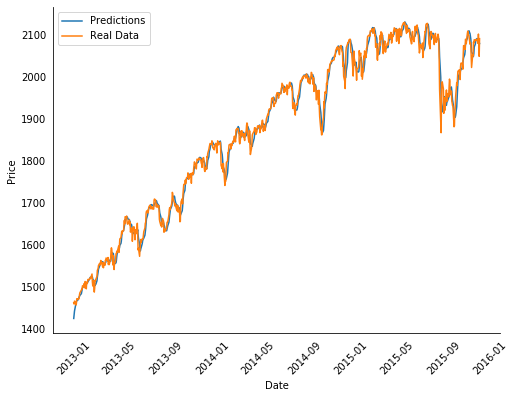

In [13]:
# Plotting
fig, ax = plt.subplots( figsize=( 8, 6))
plt.plot( df_test['Date'], y_pred, label = 'Predictions')
plt.plot( df_test['Date'], df_test['Close'], label = 'Real Data')

plt.xlabel('Date'), plt.ylabel('Price')
ax.tick_params( left = False, right = False, top = False, bottom = False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.xticks( rotation = 45)

plt.legend()
plt.show()

Random Forest

In [14]:
# Fitting Random Forest Regression to the dataset
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 300, random_state = 0)
regressor.fit(X, y)
print("Coef: ", model.coef_)
print("Intercept: ", model.intercept_)

Coef:  [[ 1.07667585 -0.07775213  0.00175467 -0.15099707  0.01121426 -0.09448721
   0.81304337]]
Intercept:  [0.05474842]


In [15]:
# Predicting a new result
y_pred = regressor.predict(X_test)

In [16]:
# Calculate the absolute errors
mae = mean_absolute_error( y_test, y_pred)
print("MAE: ", mae)
mape = 100 * (mae/y_test)
accuracy = 100 - np.mean(mape)
print('Accuracy: ', round(*accuracy, 2), '%')


MAE:  337.6649471044641
Accuracy:  81.78 %
